In [2]:
%matplotlib notebook
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import os
import json

In [3]:
base_path = "../data/animepose/images/"
image_names = os.listdir(base_path)
# os.listdir(base_path)

In [4]:
pixel_std = 200
aspect_ratio = 1

def _box2cs(box):
    x, y, w, h = box[:4]
    return _xywh2cs(x, y, w, h)

def _xywh2cs(x, y, w, h):
    center = np.zeros((2), dtype=np.float32)
    center[0] = x + w * 0.5
    center[1] = y + h * 0.5

    if w > aspect_ratio * h:
        h = w * 1.0 / aspect_ratio
    elif w < aspect_ratio * h:
        w = h * aspect_ratio
    scale = np.array(
        [w * 1.0 / pixel_std, h * 1.0 / pixel_std],
        dtype=np.float32)
    if center[0] != -1:
        scale = scale * 1.25

    return center, scale

../data/animepose/images/1787538.jpg


<IPython.core.display.Javascript object>


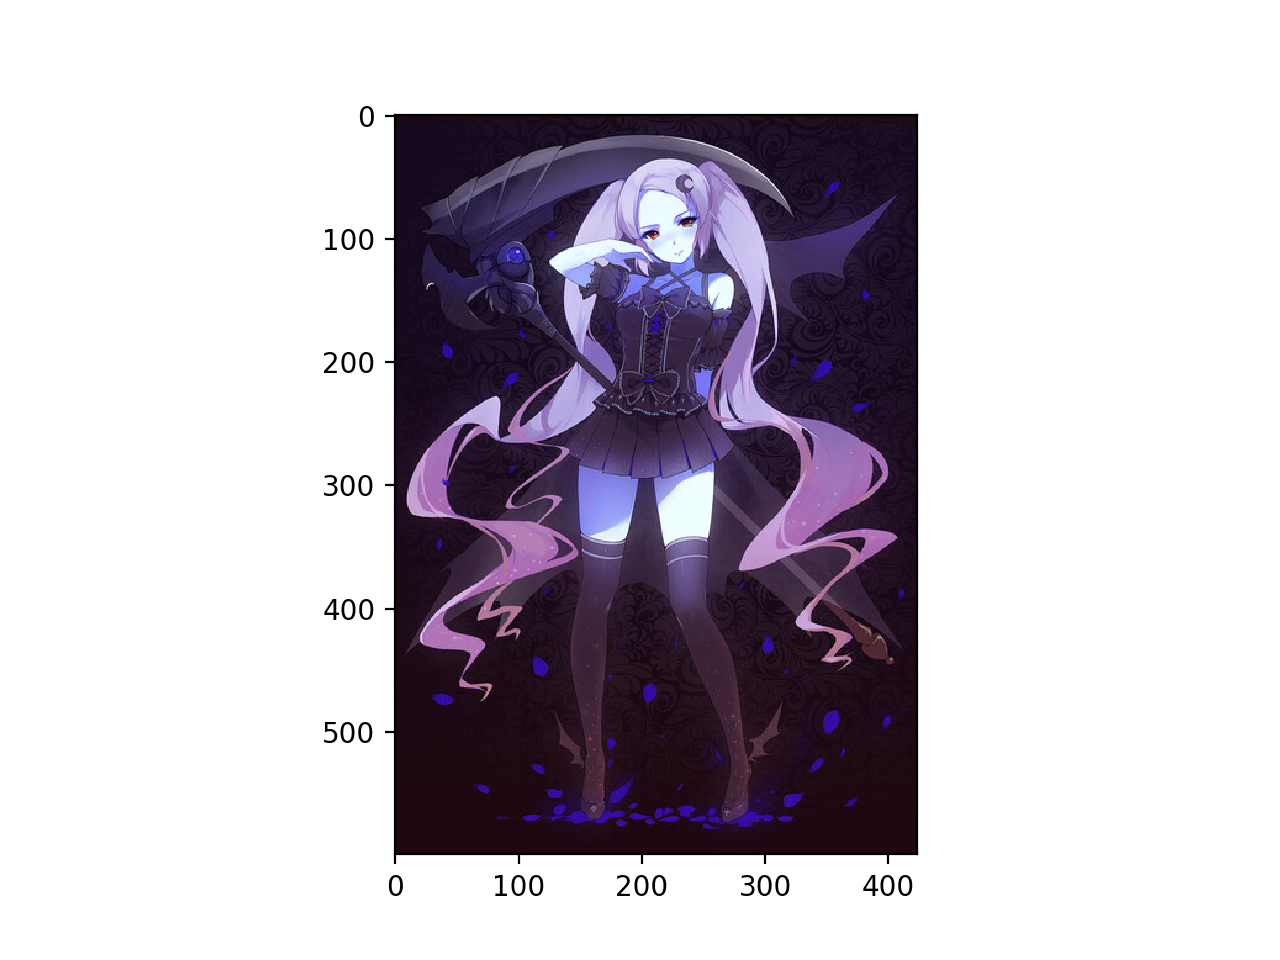

In [5]:
test_name = image_names[0]
test_path = base_path + test_name
print(test_path)
test = cv2.imread(test_path)
plt.imshow(test)
plt.show()

In [6]:
boneNames = [];
boneNames.append("body_upper");
boneNames.append("neck");
boneNames.append("head");
boneNames.append("nose_tip");
boneNames.append("nose_root");
boneNames.append("arm_left");
boneNames.append("elbow_left");
boneNames.append("wrist_left");
boneNames.append("thumb_left");
boneNames.append("arm_right");
boneNames.append("elbow_right");
boneNames.append("wrist_right");
boneNames.append("thumb_right");
boneNames.append("leg_left");
boneNames.append("knee_left");
boneNames.append("ankle_left");
boneNames.append("tiptoe_left");
boneNames.append("leg_right");
boneNames.append("knee_right");
boneNames.append("ankle_right");
boneNames.append("tiptoe_right");

In [7]:
boneEdges = [];
boneEdges.append(["body_upper", "neck"]);
boneEdges.append(["neck", "head"]);
boneEdges.append(["head", "nose_tip"]);
boneEdges.append(["head", "nose_root"]);
boneEdges.append(["neck", "arm_left"]);
boneEdges.append(["arm_left", "elbow_left"]);
boneEdges.append(["elbow_left", "wrist_left"]);
boneEdges.append(["wrist_left", "thumb_left"]);
boneEdges.append(["neck", "arm_right"]);
boneEdges.append(["arm_right", "elbow_right"]);
boneEdges.append(["elbow_right", "wrist_right"]);
boneEdges.append(["wrist_right", "thumb_right"]);
boneEdges.append(["body_upper", "leg_left"]);
boneEdges.append(["leg_left", "knee_left"]);
boneEdges.append(["knee_left", "ankle_left"]);
boneEdges.append(["ankle_left", "tiptoe_left"]);
boneEdges.append(["body_upper", "leg_right"]);
boneEdges.append(["leg_right", "knee_right"]);
boneEdges.append(["knee_right", "ankle_right"]);
boneEdges.append(["ankle_right", "tiptoe_right"]);

In [8]:
json_base_path = "../data/animepose/"
os.listdir(json_base_path)
with open(json_base_path + "train.json") as f:
    train_json = json.load(f)
with open(json_base_path + "test.json") as f:
    test_json = json.load(f)
with open(json_base_path + "val.json") as f:
    val_json = json.load(f)

all_json = train_json + test_json + val_json

In [9]:
test_key = "data/images/" + test_name
for j in all_json:
    if j['file_name'] == test_key:
        curr_json = j
        break

In [10]:
print(curr_json)
#(x, y)

{'file_name': 'data/images/1787538.jpg', 'points': {'body_upper': [208, 205], 'neck': [230, 132], 'head': [229, 116], 'nose_tip': [226, 105], 'nose_root': [223, 93], 'arm_left': [265, 141], 'elbow_left': [249, 218], 'wrist_left': [252, 308], 'thumb_left': [262, 327], 'arm_right': [193, 141], 'elbow_right': [132, 122], 'wrist_right': [172, 112], 'thumb_right': [180, 120], 'leg_left': [237, 270], 'knee_left': [239, 396], 'ankle_left': [278, 521], 'tiptoe_left': [271, 570], 'leg_right': [174, 271], 'knee_right': [165, 386], 'ankle_right': [162, 516], 'tiptoe_right': [160, 569]}, 'width': 424, 'height': 600}


In [11]:
def draw_skeleton(img, joints, edges):
    test_skeleton = img.copy()
    for edge in edges:
        joint1 = joints[edge[0]]
        joint2 = joints[edge[1]]
        cv2.line(test_skeleton, tuple(joint1), tuple(joint2), 0, thickness=5)
    return test_skeleton

def draw_skeleton2(img, joints, edges):
    test_skeleton = img.copy()
    for edge in edges:
        joint1 = boneNames.index(edge[0])
        joint2 = boneNames.index(edge[1])
        p1 = tuple(joints[joint1][:2].astype(int))
        p2 = tuple(joints[joint2][:2].astype(int))
        cv2.line(test_skeleton, p1, p2, 0, thickness=5)
    return test_skeleton

<IPython.core.display.Javascript object>


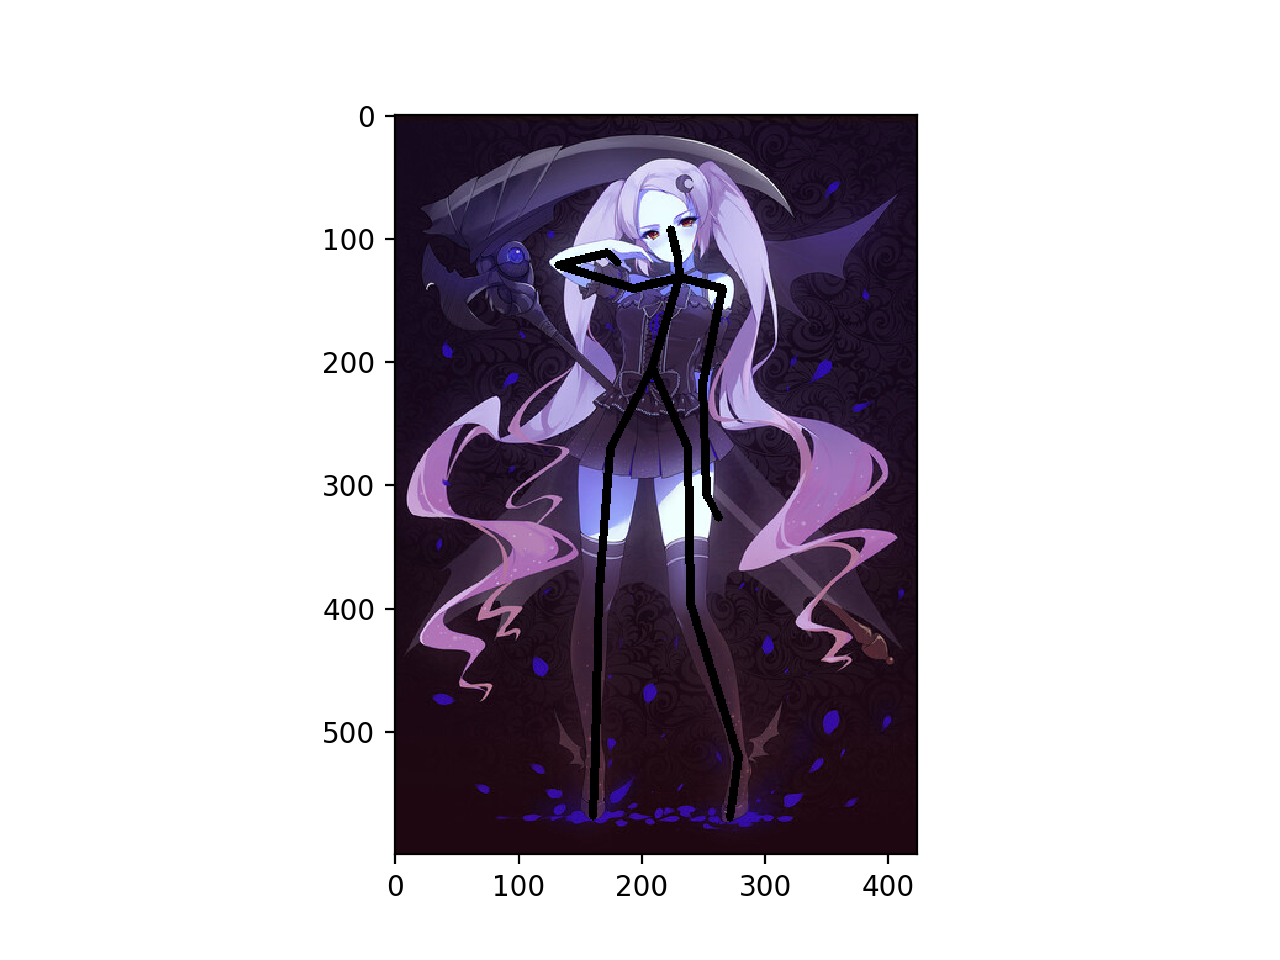

In [12]:
test_skeleton = draw_skeleton(test, curr_json['points'], boneEdges)
plt.figure()
plt.imshow(test_skeleton)
plt.show()

In [49]:
# def pad_joints(joints, offset, coord):
    

def pad_img(img, joints):
    h, w, _ = img.shape
    joints_dict = dict()
    if w < h:
        out = np.zeros((h, h, 3))
        offset = (h - w) // 2
        out[:, offset:offset+w, :] = img
        for k in joints:
            new_coord = joints[k].copy()
            new_coord[0] += offset
            joints_dict[k] = new_coord
        return out.astype("uint8"), joints, (offset, 0, w, h)
    elif h < w:
        out = np.zeros((w, w, 3))
        offset = (w - h) // 2
        out[offset:offset+h, :, :] = img
        for k in joints:
            new_coord = joints[k].copy()
            new_coord[1] += offset
            joints_dict[k] = new_coord        
        return out.astype("uint8"), joints, (0, offset, w, h)
    else:
        return img, joints, (0, 0, w, h)

def pad_img_shape(img_shp, joints):
    h, w, _ = img_shp
    joints_dict = dict()
    if w < h:
        offset = (h - w) // 2
        for k in joints:
            new_coord = joints[k].copy()
            new_coord[0] += offset
            joints_dict[k] = new_coord
        return joints, (offset, 0, w, h)
    elif h < w:
        offset = (w - h) // 2
        for k in joints:
            new_coord = joints[k].copy()
            new_coord[1] += offset
            joints_dict[k] = new_coord        
        return joints, (0, offset, w, h)
    else:
        return joints, (0, 0, w, h)    

{'body_upper': [208, 205], 'neck': [230, 132], 'head': [229, 116], 'nose_tip': [226, 105], 'nose_root': [223, 93], 'arm_left': [265, 141], 'elbow_left': [249, 218], 'wrist_left': [252, 308], 'thumb_left': [262, 327], 'arm_right': [193, 141], 'elbow_right': [132, 122], 'wrist_right': [172, 112], 'thumb_right': [180, 120], 'leg_left': [237, 270], 'knee_left': [239, 396], 'ankle_left': [278, 521], 'tiptoe_left': [271, 570], 'leg_right': [174, 271], 'knee_right': [165, 386], 'ankle_right': [162, 516], 'tiptoe_right': [160, 569]}


<IPython.core.display.Javascript object>


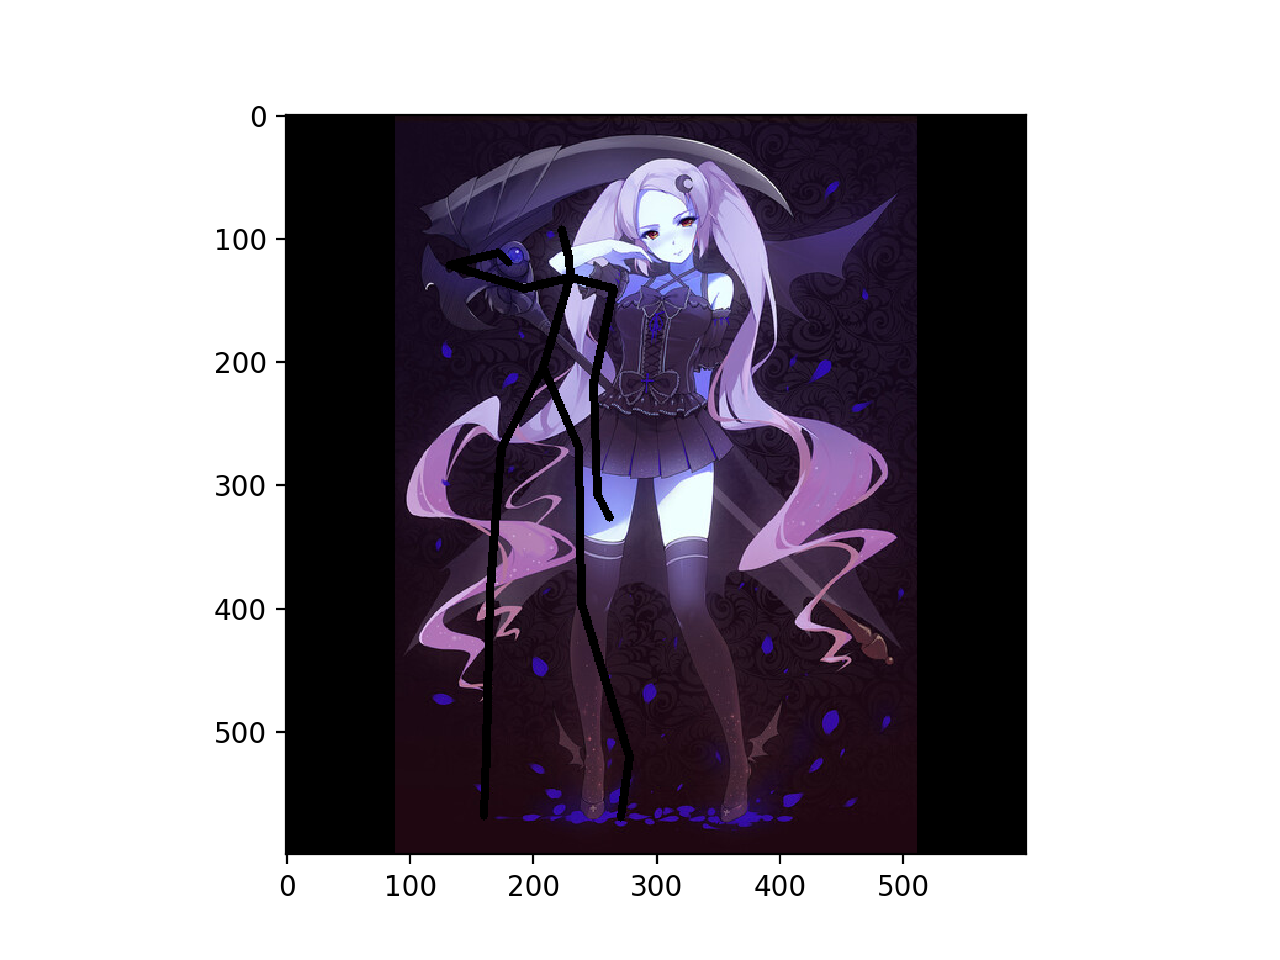

In [42]:
test_points = curr_json['points']
new_test_img, new_test_joints, box = pad_img(test, test_points)
new_skeleton = draw_skeleton(new_test_img, new_test_joints, boneEdges)
print(new_test_joints)
plt.figure()
plt.imshow(new_skeleton)
plt.show()

In [43]:
x, y, w, h = box
_xywh2cs(x, y, w, h)

(array([300., 300.], dtype=float32), array([3.75, 3.75], dtype=float32))

In [44]:
from dataset.JointsDataset import JointsDataset
from dataset.mpii import MPIIDataset
from core.config import config
from core.config import update_config
from core.config import update_dir
from core.config import get_model_name

In [45]:
# for i in range(len(boneNames)):
#     print(i, boneNames[i])

flip_pairs = [[5,9], [6,10], [7,11], [8,12], [13,17], [14,18], [15,19], [16,20]]

In [85]:
cfg_pth = "../experiments/anime/resnet50/256x256_d256x3_adam_lr1e-3.yaml"
# cfg_pth = "../experiments/mpii/resnet50/256x256_d256x3_adam_lr1e-3.yaml"
update_config(cfg_pth)
# print(config)
class AnimeDataset(JointsDataset):
    def __init__(self, cfg, root, image_set, is_train, transform=None):
        super().__init__(cfg, root, image_set, is_train, transform)
        self.num_joints = 21
#         self.flip_pairs = [[5,9], [6,10], [7,11], [8,12], [13,17], [14,18], [15,19], [16,20]]
        
        self.db = self._get_db()
        
    def _get_db(self):
        file_name = "../data/animepose/"
        with open(json_base_path + "train.json") as f:
            train_json = json.load(f)
        with open(json_base_path + "test.json") as f:
            test_json = json.load(f)
        with open(json_base_path + "val.json") as f:
            val_json = json.load(f)

        all_json = train_json + test_json + val_json
        
        gt_db = []
        for j in all_json:
#             print(j)
            image_name = j['file_name'].split("/")[2]
#             print(image_name)
            img_path = self.root+ "images/" + image_name
            if image_name in os.listdir(self.root + "images/"):
                new_joints, box = j['points'], (0,0,j['height'],j['width'])
                x, y, w, h = box
                c, s = _xywh2cs(x, y, w, h)
                if c[0] != -1:
                    c[1] = c[1] + 15 * s[1]
                    s = s * 1.15

                joints_3d = np.zeros((self.num_joints, 3), dtype=np.float)
                joints_3d_vis = np.zeros((self.num_joints,  3), dtype=np.float)
                if self.image_set != 'test':
                    joints = np.array(list(new_joints.values()))
                    joints_vis = [1] * self.num_joints
                    assert len(joints) == self.num_joints, \
                        'joint num diff: {} vs {}'.format(len(joints),
                                                          self.num_joints)

                    joints_3d[:, 0:2] = joints[:, 0:2]
                    joints_3d_vis[:, 0] = joints_vis[:]
                    joints_3d_vis[:, 1] = joints_vis[:]
                gt_db.append({
                    'image': img_path,
                    'center': c,
                    'scale': s,
                    'joints_3d': joints_3d,
                    'joints_3d_vis': joints_3d_vis,
                    'filename': '',
                    'imgnum': 0,
                    })
        return gt_db
    
    def evaluate(self, cfg, preds, output_dir, *args, **kwargs):
        pass

In [87]:
anime_dataset = AnimeDataset(config, "../data/animepose/", "train", True)

In [23]:
mpii_dataset = MPIIDataset(config, "../data/mpii", "train", "true")

/home/skware/ml/libs3.6/lib/python3.6/site-packages/json_tricks/nonp.py:223: JsonTricksDeprecation: `json_tricks.load(s)` stripped some comments, but `ignore_comments` was not passed; in the next major release, the behaviour when `ignore_comments` is not passed will change; it is recommended to explicitly pass `ignore_comments=True` if you want to strip comments; see https://github.com/mverleg/pyjson_tricks/issues/74
  JsonTricksDeprecation)


[[181.65760961 139.00305646   0.        ]
 [197.32040879 113.69222647   0.        ]
 [203.07252637 109.7096034    0.        ]
 [211.88832796 108.56134467   0.        ]
 [214.46502278 105.77617744   0.        ]
 [186.42990664 109.81968155   0.        ]
 [166.54766206 130.19309682   0.        ]
 [178.87078199 157.10080151   0.        ]
 [181.20315204 161.84308845   0.        ]
 [201.85256289 126.67243432   0.        ]
 [185.42425779 146.10606324   0.        ]
 [179.53205167 160.29707153   0.        ]
 [181.36993001 166.13257812   0.        ]
 [156.03825251 149.93359234   0.        ]
 [118.88465012 195.68037931   0.        ]
 [ 84.16181182 234.88869558   0.        ]
 [ 73.13706332 255.18622454   0.        ]
 [167.60336906 164.25134473   0.        ]
 [130.81167238 212.40054602   0.        ]
 [ 85.98634544 233.47526472   0.        ]
 [ 80.02409505 252.77046562   0.        ]]


<IPython.core.display.Javascript object>


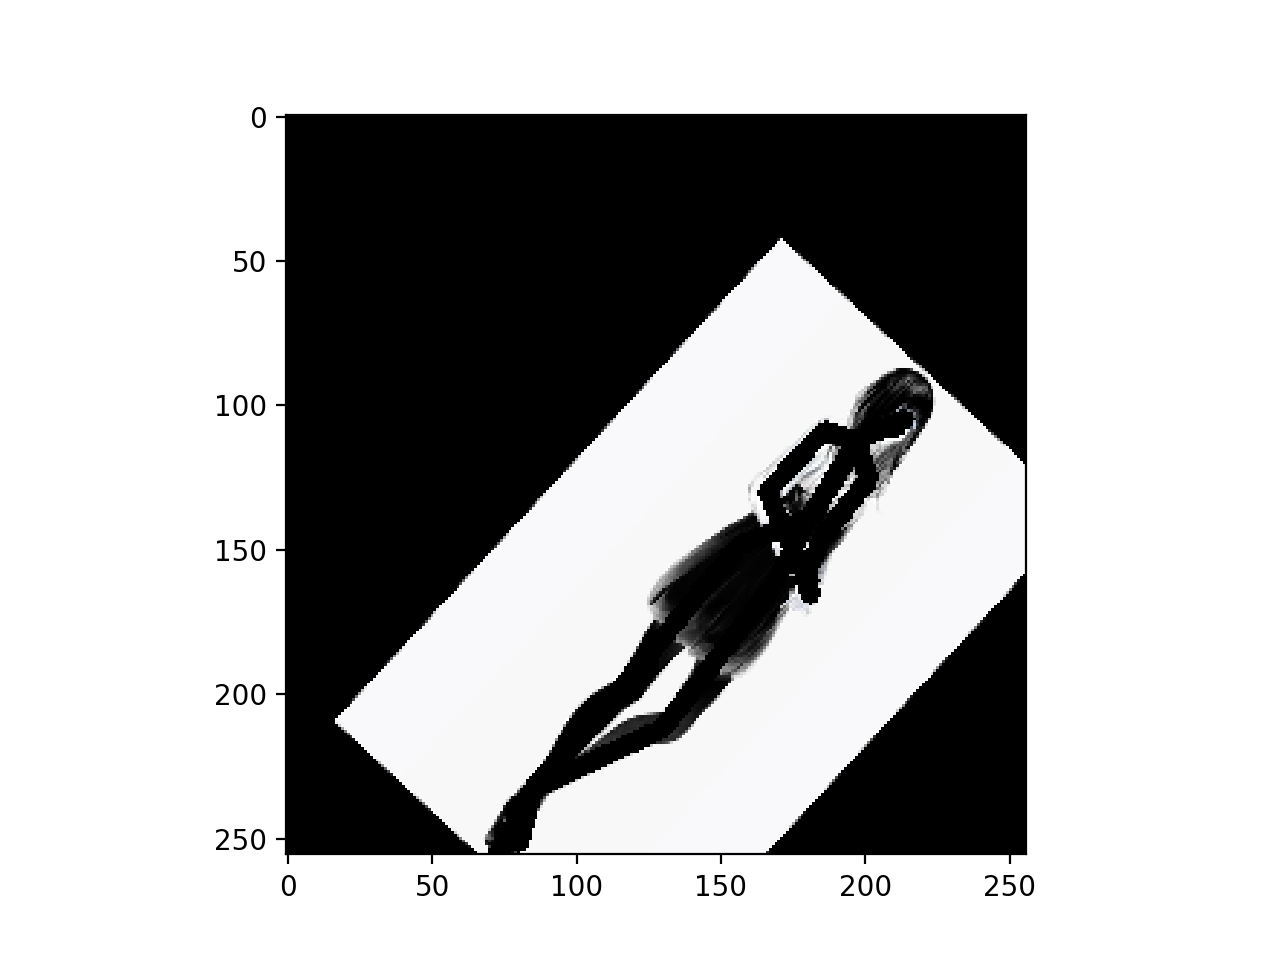

In [88]:
anime_dataset_test = anime_dataset[0]
print(anime_dataset_test[3]['joints'])
plt.figure()
plt.imshow(draw_skeleton2(anime_dataset_test[0], anime_dataset_test[3]['joints'], boneEdges))